<a href="https://colab.research.google.com/github/presentchris/Computer-Vision/blob/main/Practice_of_Stats%26Modelings7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##이미지 전처리 및 특징 추출
1. 각 이미지를 Grayscale로 변환합니다.
2. 변환된 Grayscale 이미지를 64x64 크기로 Resize합니다.
3. Resize된 이미지에서 윤곽(Contours)을 찾고, 이미지에 윤곽을 그립니다.
4. 찾은 윤곽 중 가장 큰 윤곽의 면적과 둘레를 계산합니다.

<요구사항>
- OpenCV를 사용하여 이미지 처리를 수행하세요.
- 이미지 변환, 크기 조정, 윤곽 검출 과정을 함수로 구현하세요.
- 가장 큰 윤곽의 면적과 둘레를 출력하세요.


In [ ]:
import cv2
import numpy as np

In [ ]:
def process_image(image_path):
  # 이미지를 Grayscale로 변환
  image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGRA2GRAY)

  # 이미지를 64x64 크기로 Resize
  resized_image = cv2.resize(gray_image, (64, 64))

  # 윤곽(Contours) 찾기
  _, thresh = cv2.threshold(resized_image, 127, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # 가장 큰 윤곽 선택
  c = max(contours, key=cv2.contourArea)

  # 면적과 둘레 계산
  area = cv2.contourArea(c)
  perimeter = cv2.arcLength(c, True)

  # 윤곽 그리기
  contour_image = cv2.drawContours(resized_image.copy(), [c], -1, (0, 255, 0), 3)

  return contour_image, area, perimeter

# 예시 이미지 경로(적절히 변경 필요)
image_path = 'path/to/my/image.jpg'
contour_image, area, perimeter = process_image(image_path)

print(f'Area: {area}, Perimeter: {perimeter}')
cv2.imshow('Contour Image', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

##단순 선형 회귀 모델 구현

1. 임의의 데이터셋을 생성하거나 실제 데이터셋을 사용하세요.
2. 단순 선형 회귀 모델을 구현하여 학습시키세요.
3. 학습된 모델로부터 종속 변수의 값을 예측하세요.
4. 모델의 성능을 평가하기 위해 MSE(Mean Squared Error)를 계산하세요.

<요구사항>
- NumPy 또는 Pandas를 사용하여 데이터를 처리하세요.
- Matplotlib 또는 Seaborn을 사용하여 데이터와 회귀선을 시각화하세요.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 임의의 데이터셋 생성
np.random.seed(42)
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
# 선형 회귀 모델 구현
# 각 샘플에 x0 = 1을 추가
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

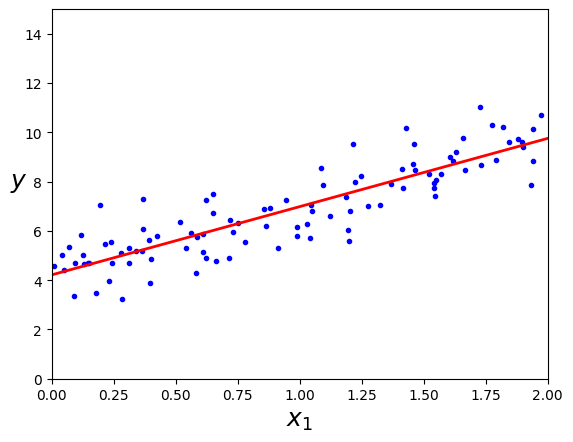

In [ ]:
# 데이터와 회귀선 시각화
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r-', linewidth = 2)
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.show()

##이미지 분류 모델링
1. CIFAR-10 데이터셋을 로드하고 전처리하세요.
2. 컨볼루션 신경망 모델을 구축하세요.
3. 모델을 학습시키고, 테스트 데이터셋에 대한 정확도를 평가하세요.

<요구사항>
- TensorFlow 또는 PyTorch를 사용하여 CNN 모델을 구현하세요.
- 모델 학습 과정에서의 손실과 정확도를 시각화하세요.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

In [ ]:
# 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# 모델 구축
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
# 모델 컴파일 및 학습
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 1, validation_data = (X_test, y_test))

1563/1563 [==============================] - 98s 62ms/step - loss: 1.3351 - accuracy: 0.5222 - val_loss: 1.1789 - val_accuracy: 0.5764


##시계열 예측 모델링
주어진 시계열 데이터에 대해 LSTM(Long Short-Term Memory) 모델을 사용하여 다음 N개 시점의 값을 예측하세요.

1. 임의의 시계열 데이터를 생성하거나 실제 시계열 데이터를 사용하세요.
2. 데이터를 학습용과 테스트용으로 분할하세요.
3. LSTM 모델을 구축하여 시계열 데이터를 학습시키세요.
4. 학습된 모델을 사용하여 테스트 데이터에 대한 예측을 수행하고, 예측 성능을 평가하세요.

<요구사항>
- 데이터 분할 시 시계열의 연속성을 유지하세요.
- TensorFlow 또는 PyTorch를 사용하여 LSTM 모델을 구현하세요.
- 모델의 예측 결과를 실제 값과 비교하여 시각화하세요.







In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# 임의의 시계열 데이터 생성(실제 데이터 사용 필요)
data = np.sin(np.linspace(0,20,100)) + np.random.normal(0,0.1,100)
X, y = [], []
for i in range(10, len(data)):
  X.append(data[i-10:i])
  y.append(data[i])
X, y = np.array(X), np.array(y)

In [ ]:
# LSTM 모델 구축
model = Sequential([
    LSTM(50, return_sequences=False, input_shape = (X.shape[1], 1)),
    Dense(1)
])

In [ ]:
# 모델 컴파일 및 학습
# "loss = 'mean_squared_error'"라고 쓸 수 있음
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X[...,np.newaxis], y, epochs=5, validation_split = 0.2)

Epoch 1/5
3/3 [==============================] - 5s 286ms/step - loss: 0.3493 - val_loss: 0.4162
Epoch 2/5
3/3 [==============================] - 0s 25ms/step - loss: 0.3228 - val_loss: 0.3984
Epoch 3/5
3/3 [==============================] - 0s 24ms/step - loss: 0.3025 - val_loss: 0.3756
Epoch 4/5
3/3 [==============================] - 0s 25ms/step - loss: 0.2855 - val_loss: 0.3507
Epoch 5/5
3/3 [==============================] - 0s 27ms/step - loss: 0.2652 - val_loss: 0.3258
